#                           Detecting Credit Card Fraud with ML/DL

### Context
#### It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
### Business challenge
Detecting fraud transactions is of great importance for any credit card company. We are tasked by a well-known company to detect potential frauds so that customers are not charged for items that they did not purchase. So the goal is to build a classifier that tells if a transaction is a fraud or not


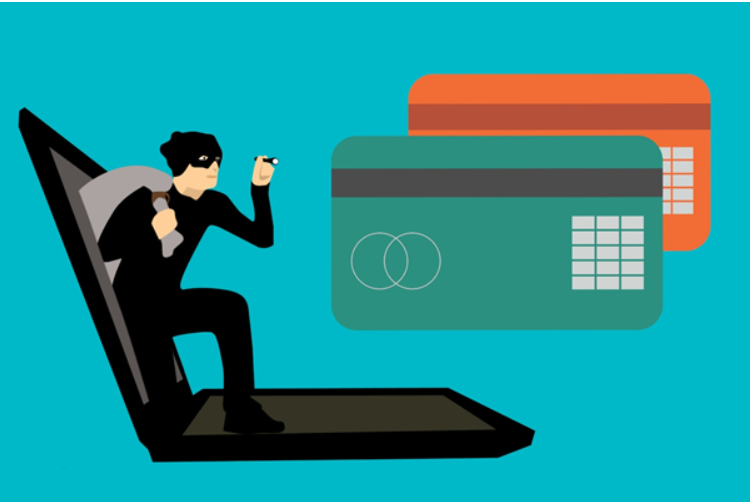

### Dataset info
 The dataset is the Kaggle Credit Card Fraud Detection dataset here. It contains two-day transactions made on 09/2013 by European cardholders. The dataset contains 492 frauds out of 284,807 transactions. Thus, it is highly unbalanced, with the positive (frauds) accounting for only 0.17%. Looking at the data , you may find it only contains numerical variables. Features V1, V2, … V28 are the principal components obtained with PCA transformation. The only features which have not been transformed are ‘Time’ and ‘Amount’. ‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount. ‘Class’ is the response variable with 1 as fraud and 0 otherwise.

In [40]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# checking the contents of the folder
import os
os.listdir()

['.ipynb_checkpoints', 'creditcard.csv', 'creditcard.ipynb']

In [42]:
# Loading the dataset
df = pd.read_csv('creditcard.csv')

In [43]:
# view first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
#check number of columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### EDA

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [47]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
# check for 0's [0,0.0] in a dataframe. returns False if present.
df.all()

Time      False
V1         True
V2         True
V3         True
V4         True
V5         True
V6         True
V7         True
V8         True
V9         True
V10        True
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount    False
Class     False
dtype: bool

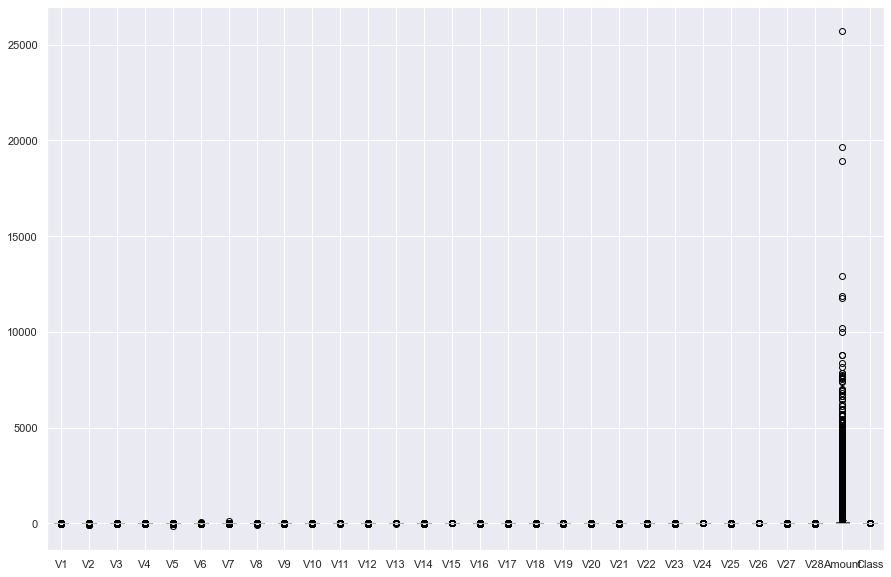

In [49]:
# dropping the irrelevant columns and plotting the box plot
df.drop('Time',axis=1).boxplot(figsize=(15,10));

<AxesSubplot:>

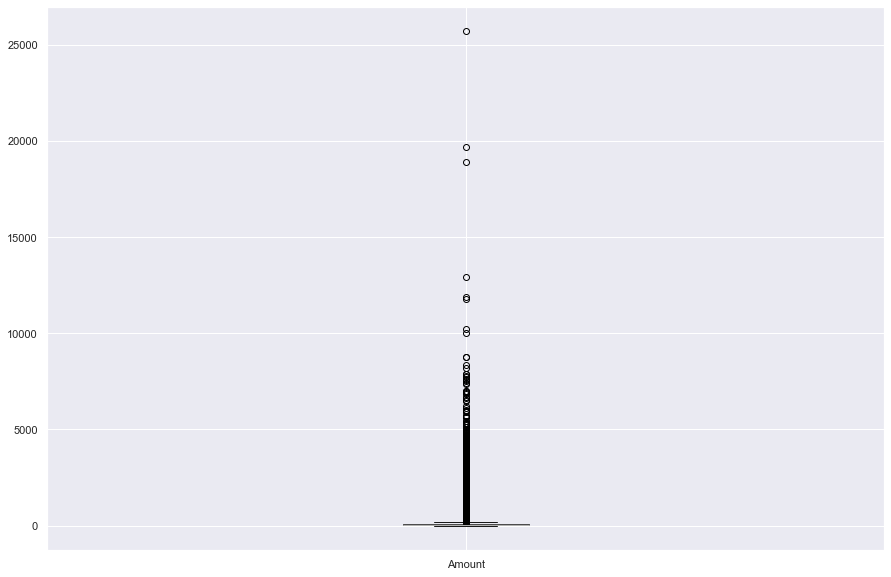

In [50]:
# examining box plot for the amount column for the variance and outliers
# and also checking if amount has relationship with the fraud cases.
df.boxplot(column=['Amount'])

In [51]:
# finding upper and lower bound to extract the outliers
array_amount = df.Amount.to_numpy()
# finding the 1st quartile
q1 = np.quantile(array_amount, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(array_amount, 0.75)
med = np.median(array_amount)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

#checking if outliers in amount column reflect number of fraud transactions.
# eg -to check if amount is within the normal interquartile range then there will be no fraud transactions. 
df[(df['Amount'] >= 184.5125) | (df['Amount'] <= -101.7475)]['Class'].value_counts()

71.565 184.5125 -101.7475


0    31813
1       91
Name: Class, dtype: int64

In [52]:
# in our case there is no relationship between outlying amount and the fraud transactions as the number of fraud transactions 
# is not coinciding with number of outliers.

In [53]:
# checking if there is a relation between amount = 0 and fradulent transactions. 
print ('Total number of transactions where amount is 0  = %d' %(len(df[df.Amount == 0])))
df[df.Amount == 0]['Class'].value_counts()

Total number of transactions where amount is 0  = 1825


0    1798
1      27
Name: Class, dtype: int64

In [54]:
#dropping irrlevant data (time) column
df = df.drop('Time',axis = 1)

<AxesSubplot:>

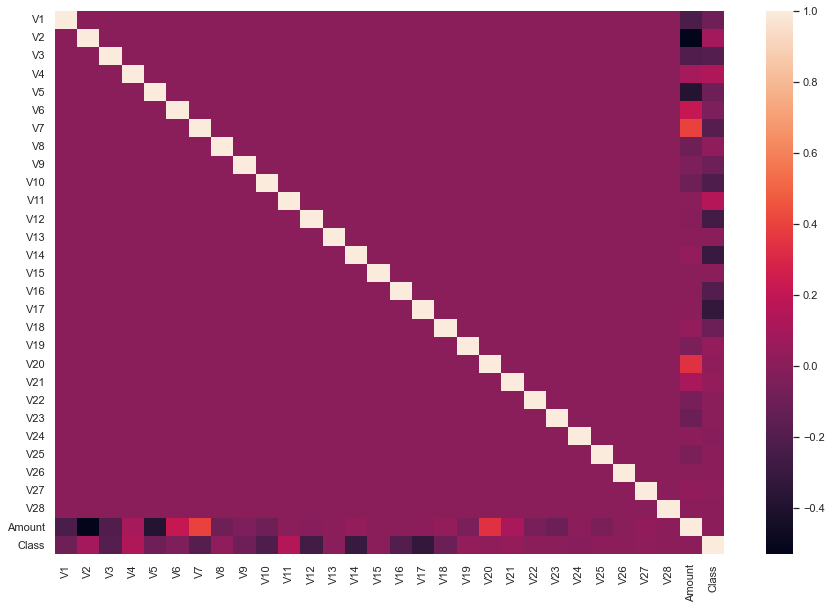

In [55]:
#Coorelation plot
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr())

In [56]:
#removing duplicate rows (reduced rows from 284807 to 275663)
df.drop_duplicates(inplace=True)

In [57]:
print ('number of fraud cases = %d' %(df.Class[df.Class == 1].count()))
print ('number of non fraud cases = %d' %(df.Class[df.Class == 0].count()))

number of fraud cases = 473
number of non fraud cases = 275190


In [19]:
# finding upper and lower bound to extract the outliers
array_amount = df.Amount.to_numpy()
# finding the 1st quartile
q1 = np.quantile(array_amount, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(array_amount, 0.75)
med = np.median(array_amount)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

#re- checking if outliers in amount column reflect number of outliers. after removing duplicate columns
df[(df['Amount'] >= 190.325) | (df['Amount'] <= -104.115)]['Class'].value_counts()

73.61 190.325 -104.115


0    30581
1       83
Name: Class, dtype: int64

We already know that transactions classified as fraudulent represent only 0.17% of our dataset. To get a better visualization, I’m going to plot a bar chart, so we can confirm this unbalance.

<AxesSubplot:>

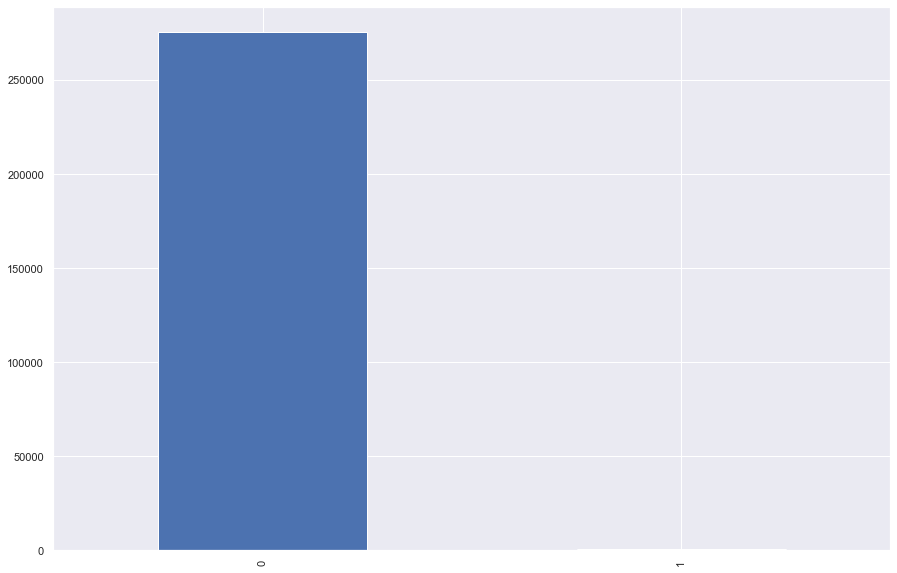

In [62]:
df.Class.value_counts().plot(kind = 'bar')

In the graph above, the discrepancy between the classes is clear. Therefore, it will be necessary to balance the data, so that our models are not harmed by training on unbalanced data. It seems that even if we save work with missing values, it will still require a lot of work to balance this data.

### Robust Scaler

Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range.

In case of our data which is an anomaly detection problem, outlier may be one cause of the anomaly. For that reason, we have to choose the scaling feature which maintains the integrity of the outlier as is. Hence in this case I have choosen Robusr scaling over other scaling methods in this particular case

In [63]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
df_scaled = transformer.fit_transform(df)

In [64]:
df_s = pd.DataFrame(df_scaled,columns = df.columns)

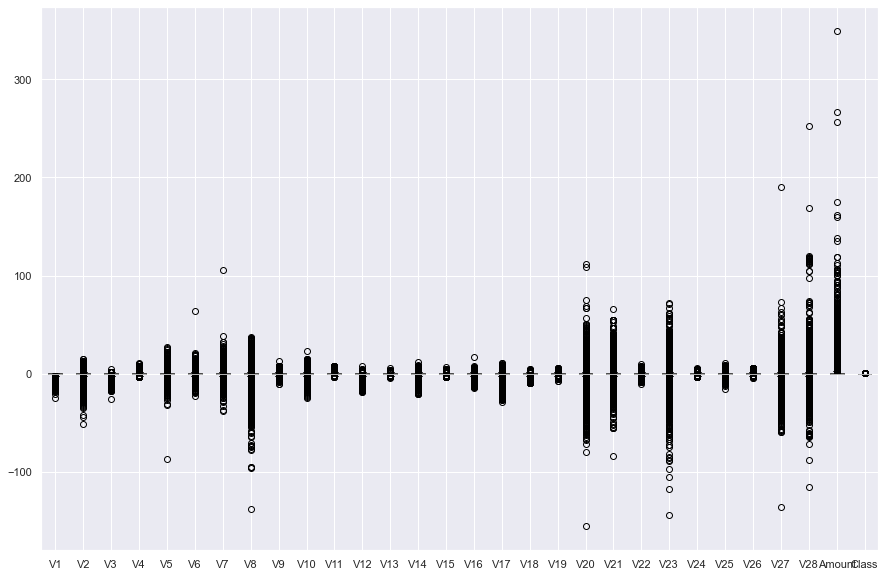

In [65]:
df_s.boxplot();

In [66]:
print (df_s.Class.dtype)
df_s['Class'] = df_s['Class'].astype(int)
print (df_s.Class.dtype)

float64
int32


In [68]:
# split the data in to dependent and independent variables
X = df_s.drop('Class',axis=1)
y = df_s.Class

###  Imbalance class handling

methods

A. Under sampling

B. Oversampling
1. Smote
2. Borderline Smote
3. ADASYN


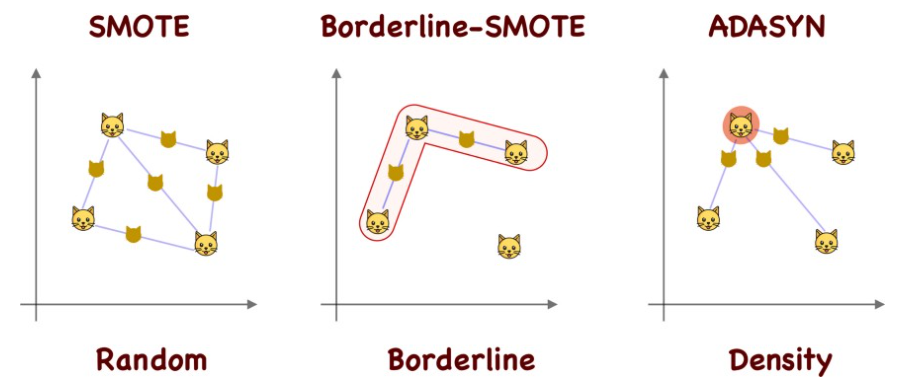

### Adaptive Synthetic (ADASYN) 
ADASYN is a technique that is based on the SMOTE algorithm for generating synthetic data. The difference between ADASYN and SMOTE is that ADASYN implements a methodology that detects those samples of the minority class found in spaces dominated by the majority class, this in order to generate samples in the lower density areas of the minority class. That is, ADASYN focuses on those samples of the minority class that are difficult to classify because they are in a low-density area.

Original dataset shape Counter({0: 275190, 1: 473})
Resampled dataset shape Counter({0: 275190, 1: 275156})


<AxesSubplot:>

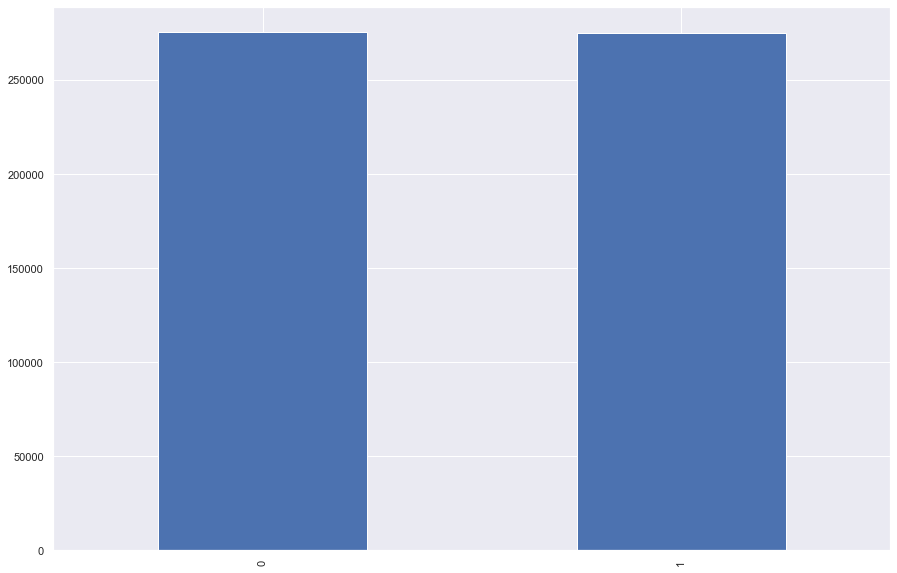

In [106]:

from collections import Counter
from imblearn.over_sampling import ADASYN 

print('Original dataset shape {}'.format(Counter(y)))

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))
y_res.value_counts().plot(kind = 'bar')

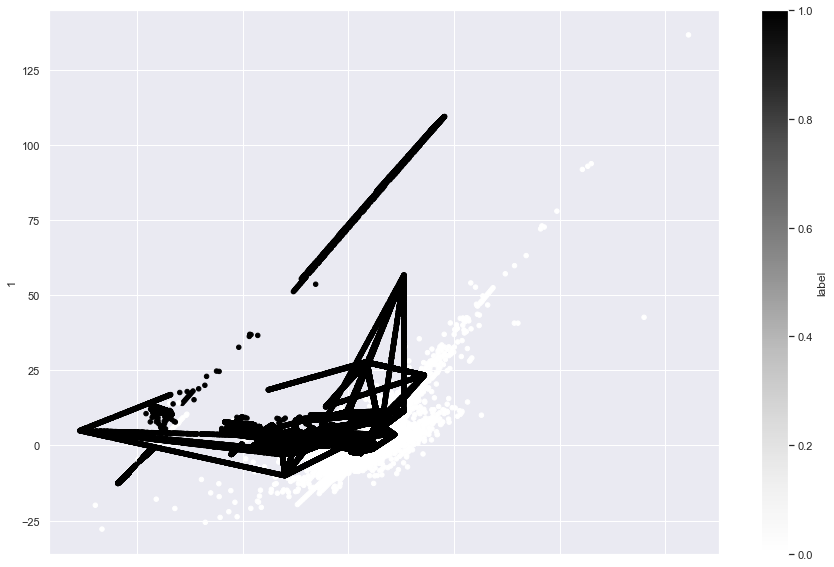

In [71]:
#viewing the dataset results after ADASYN transformation for unbalanced data.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_1 = pca.fit_transform(X_res)
X_1 = pd.DataFrame(X_1)
X_1['label'] = y_res
X_1.plot(x = 0,y = 1,kind = 'scatter',c = 'label',)
plt.show()

In [74]:
#splitting the data also, we have used stratifies because we wanted the same amount of fraud cases in the training dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,stratify= y_res)

In [75]:
print('Resampled dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_test)))

Resampled dataset shape Counter({0: 192633, 1: 192609})
Resampled dataset shape Counter({0: 82557, 1: 82547})


In [81]:
#importing the necessaty libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_auc_score,roc_curve,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

###### Logistic regression,  SVM, Random Forest

# Logistic regression

In [78]:
#initiating the model and importing the necessary libraries
from sklearn.linear_model import LogisticRegression

# initiating the mocel
model_lr = LogisticRegression()

# fitting the data
model_lr.fit(X_train,y_train)

#predecting on the test data
predictions_lr = model_lr.predict(X_test)

Accuracy score : 0.892232
Precision score : 0.913288
[[75764  6793]
 [11000 71547]]


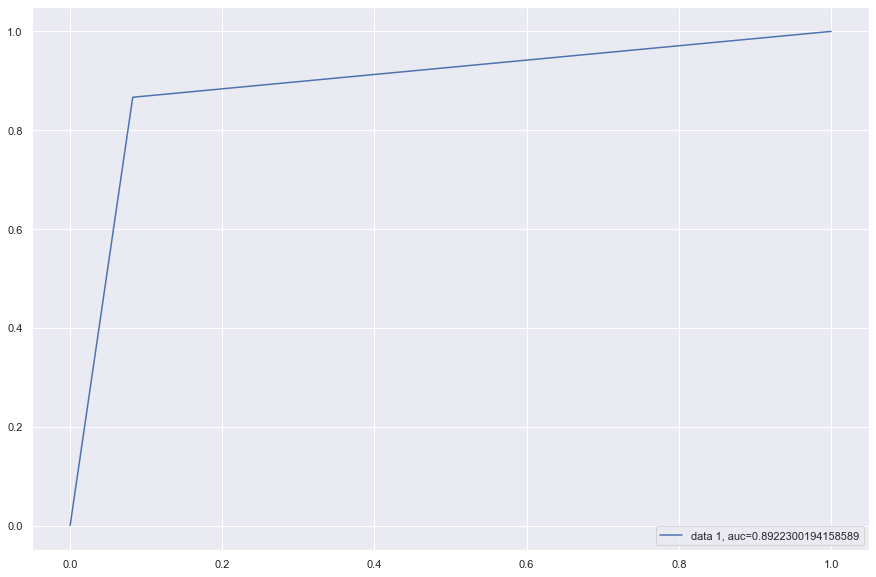

In [120]:
# printing the performance metrics
print('Accuracy score : %f' %(accuracy_score(y_test,predictions_lr)))
print('Precision score : %f' %((precision_score(y_test,predictions_lr))))
print(confusion_matrix(y_test,predictions_lr))


# plotting the AUC and measuring the ROC
fpr, tpr, _ = roc_curve(y_test, predictions_lr)
auc = roc_auc_score(y_test, predictions_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random forest

In [93]:
#importing the necessary libraries and performance matrix
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier

# initiate the model
model_rf = RandomForestClassifier(random_state= 42)  

# setting up parameters for the parameter grid
scoring = {"Precision": 'precision', "Accuracy": 'accuracy'}

cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=1)

parameter = {
             'n_estimators': [200,300,400,500],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini', 'entropy'],
             'min_samples_leaf': [3, 4, 5],
             'min_samples_split': [8, 10, 12],
             'bootstrap': [True, False] # boot straping method is used to build the tree rather than using whole dataset

            }

result_rf = GridSearchCV(estimator = model_rf, 
                         param_grid = parameter, 
                         cv = cv, 
                         scoring= scoring,
                         refit="Precision", #refits with the parameter setting that has the best cross-validated score.
                         n_jobs = -1, #means using all processors
                         return_train_score =False # to get insights on how different parameter settings impact the overfitting/underfitting trade-off.
                        )


In [36]:
# fitting the model
result_rf.fit(X_train, y_train)

# printing best parameters
print(result_rf.best_params_)

#printing best scores obtained using the best parameters
print(result_rf.best_score_)

# storing the data in to dataframe and printing the same.
a = pd.Dataframe(result_rf.cv_results_)
print (a)
#print(a.get('params')) # get all the combinations
#print(a.get('mean_test_score')) 
#print(a.get('mean_train_score'))

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
p = rf.predict(X_test)


Accuracy score : 0.999836
Precision score : 0.999673
[[82530    27]
 [    0 82547]]


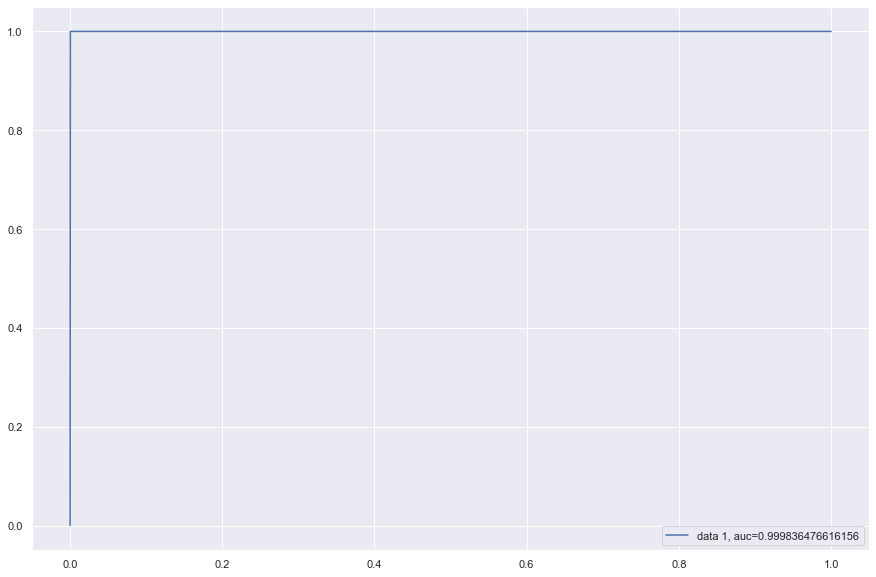

In [119]:
# printing the performance metrics
print('Accuracy score : %f' %(accuracy_score(y_test,p)))
print('Precision score : %f' %((precision_score(y_test,p))))
print(confusion_matrix(y_test,p))


# plotting the AUC and measuring the ROC
fpr, tpr, _ = roc_curve(y_test, p)
auc = roc_auc_score(y_test, p)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<AxesSubplot:xlabel='feature_names'>

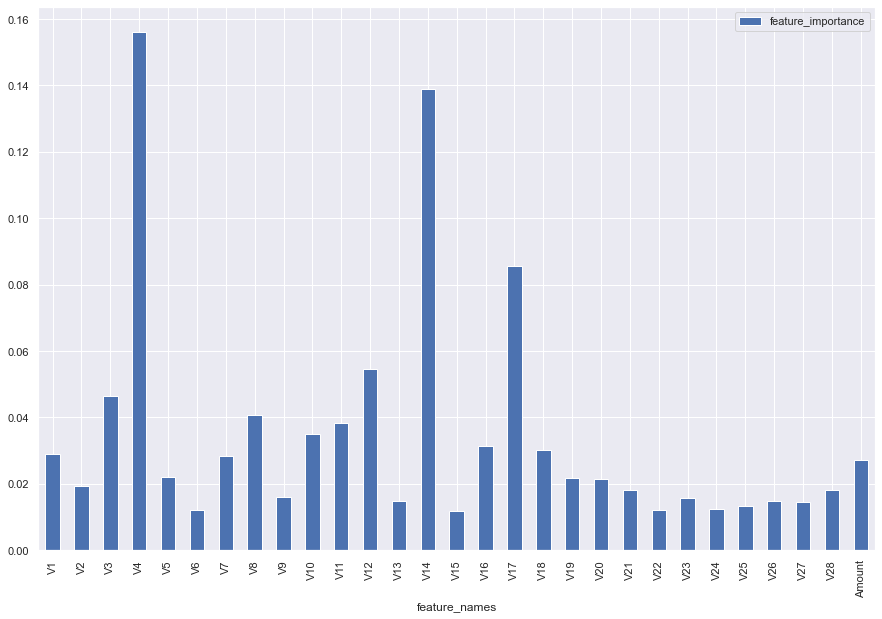

In [91]:
# plotting out the results indicating important features.
d = {'feature_names' : rf.feature_names_in_,'feature_importance' : rf.feature_importances_}
f = pd.DataFrame(d)
f.plot(x = 'feature_names', y = 'feature_importance',kind = 'bar')

## SVM

In [80]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_test,y_test)
predictions_svm = model_svm.predict(X_test)

In [81]:
print(confusion_matrix(y_test, predictions_svm))
print('accuracy_score = %f'%(accuracy_score(y_test, predictions_svm)))
print ('precision_score = %f'%(precision_score(y_test, predictions_svm)))

[[79504  3053]
 [ 1767 80780]]
accuracy_score = 0.970806
precision_score = 0.963582


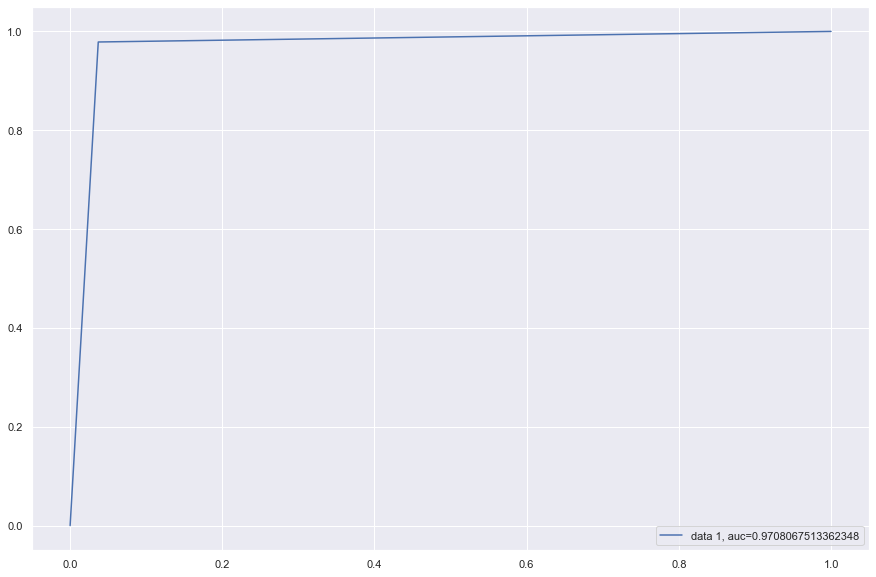

In [84]:
fpr, tpr, _ = roc_curve(y_test,  predictions_svm)
auc = roc_auc_score(y_test, predictions_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ANN

In [108]:
X_train.shape

(385242, 29)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Dense(64,input_dim=29,activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

history = model.fit(X_train, y_train, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
12039/12039 [==============================] - 22s 2ms/step - loss: 0.2531 - precision: 0.9031 - recall: 0.8972 - val_loss: 0.0626 - val_precision: 0.9685 - val_recall: 0.9989
Epoch 2/5
12039/12039 [==============================] - 22s 2ms/step - loss: 0.0559 - precision: 0.9771 - recall: 0.9938 - val_loss: 0.0223 - val_precision: 0.9887 - val_recall: 1.0000
Epoch 3/5
12039/12039 [==============================] - 22s 2ms/step - loss: 0.0257 - precision: 0.9890 - recall: 0.9987 - val_loss: 0.0121 - val_precision: 0.9942 - val_recall: 1.0000
Epoch 4/5
12039/12039 [==============================] - 22s 2ms/step - loss: 0.0164 - precision: 0.9932 - recall: 0.9994 - val_loss: 0.0087 - val_precision: 0.9960 - val_recall: 1.0000
Epoch 5/5
12039/12039 [==============================] - 22s 2ms/step - loss: 0.0117 - precision: 0.9951 - recall: 0.9995 - val_loss: 0.0065 - val_precision: 0.9973 - val_recall: 1.0000


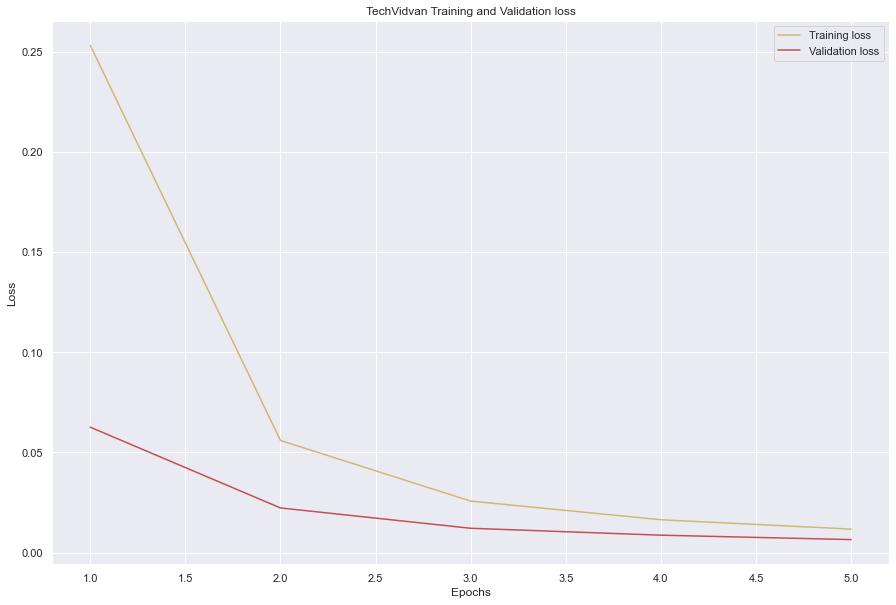

In [114]:
# plot the training and validation accuracy and loss at each epochs:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('TechVidvan Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy score : 0.998625
Precision score : 0.997258
[[82330   227]
 [    0 82547]]


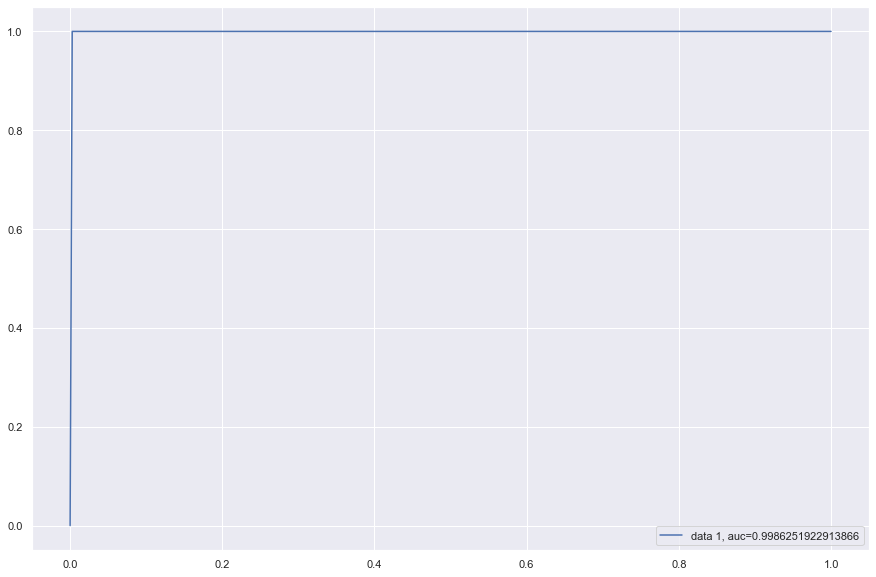

In [118]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

print('Accuracy score : %f' %(accuracy_score(y_test,y_pred_nn)))
print('Precision score : %f' %((precision_score(y_test,y_pred_nn))))
print(confusion_matrix(y_test,y_pred_nn))

fpr, tpr, _ = roc_curve(y_test, y_pred_nn)
auc = roc_auc_score(y_test, y_pred_nn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Well, We just received 99.95% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.
Finally, based on our accuracy score — Random forest and ANN is the winner for our case. The only catch here is the data that we have received for model training. The data features are the transformed version of PCA. If the actual features follow a similar pattern then we are doing great!!